In [0]:
#@title Mount Google Drive { run: "auto" }
from google.colab import drive
from IPython.display import clear_output
import os,glob
import sys
#!pip  uninstall  plotly
#!apt-get install python-StringIO

drive.mount("/drive/", force_remount=True)
opspath='/drive/My Drive/WindData/'
sys.path.insert(0, opspath)
import E as E
import inverse
clear_output()
print("google drive imported")

google drive imported




```
# This is formatted as code
```

###Generate Wind

*The variable "noise" is the turbulent (3s) wind which is added to the Weibull distributed 10 min wind speed. It is modeled according to the NTM as defined in the IEC61400-1ed3, i.e. It is assumed that horizontal turbulence is normally distributed.*

>$\sigma=I_{ref}$(a $V_{10min}$+b) ; $a$ = $0.75$, $b$ = $5.7$

*$a$ and $b$ are first and zero 
order parameters that define turbulent wind.*

In [0]:
CH01=E.Mast(name='CH01') 
CH01.loadwrfdata('/drive/My Drive/WindData/AWS229.csv')

In [0]:
#@title Generate Wind { run: "auto" }
IEC_classes={'I':10,'II':8.5,'III':7.5}
IEC_subclasses={'A':0.16,'B':0.14,'C':0.12}
ndays=365*3
IEC_class='III'
IEC_subclass='C'
Iref=IEC_subclasses[IEC_subclass]
scale=IEC_classes[IEC_class]
mywind=E.Wind()
mywind.generate_wind(scale,ndays,Iref)    
mywind.data.to_pickle(opspath+"/wind"+IEC_class+IEC_subclass+".pkl")


In [0]:
#@title Plot{ run: "auto" }
#!pip install mpld3

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import E 
import pandas as pd
import datetime
from ipywidgets import widgets,interact, interactive, AppLayout, Button, interact_manual

#import mpld3 

#mpld3.enable_notebook()

plt.style.use('fivethirtyeight')

dataset=CH01.data
#dataset=pd.read_pickle('/drive/My Drive/WindData/windIIIC.pkl')
n=400
%matplotlib inline

xwidget=widgets.Dropdown(
    options=dataset.columns,
    value=dataset.columns[0],
    description='X:',
    disabled=False,
)

ywidget=widgets.Dropdown(
    options=dataset.columns,
    value=dataset.columns[0],
    description='y:',
    disabled=False,
)

cwidget=widgets.Dropdown(
    options=dataset.columns,
    value=dataset.columns[0],
    description='color:',
    disabled=False,
)

def make_plot(xstr,ystr,cstr):
    fig=plt.figure(num=0, figsize=(12,10), dpi=60, facecolor='w', edgecolor='k')
    x=dataset[xstr][0:n] 
    y=dataset[ystr][0:n]
    color= dataset[cstr][0:n]

    plt.xlabel(xstr)
    plt.ylabel(ystr)
    plt.scatter(x, y, c=color,  cmap=cm.viridis, marker='o' , facecolors='none')


ywidget1=widgets.Dropdown(
    options=dataset.columns,
    value=dataset.columns[0],
    description='variable1:',
    disabled=False,
)
ywidget2=widgets.Dropdown(
    options=dataset.columns,
    value=dataset.columns[0],
    description='variable2:',
    disabled=False,
)
ywidget3=widgets.Dropdown(
    options=dataset.columns,
    value=dataset.columns[0],
    description='variable3:',
    disabled=False,
)


timeslider=widgets.IntRangeSlider(
    value=[0, 70],
    min=0,
    max=len(dataset.index),
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)


#fig=plt.figure()

def make_plotts(ystr1,ystr2,ystr3,trange):
#    %matplotlib inline

    fig=plt.figure(num=0, figsize=(12,10), dpi=60, facecolor='w', edgecolor='k')
    ax = fig.add_subplot()
    x=dataset.index[trange[0]:trange[1]]
    y=dataset[[ystr1,ystr2,ystr3]][trange[0]:trange[1]]
    y=dataset[[ystr1]][trange[0]:trange[1]]
    ax.set_xlabel("date") 
   # plt.ylim(0,30)
   # plt.plot_date(x, y,'-')
    line, = ax.plot(x,y)
  #  line.set_ydata(y)
    #line.set_xdata(x)
    #fig.canvas.draw_idle()
  #  plt.plot(x,y)



button=widgets.Button(description='press')
plotwidget=widgets.interactive_output(make_plotts, {'xstr': xwidget, 'ystr': ywidget,'cstr': cwidget })
plotwidgetts=widgets.interactive_output(make_plotts, {'ystr1': ywidget1, 'ystr2': ywidget2,'ystr3': ywidget3, 'trange':timeslider})

plotwidget.layout.height = '350px'
plotwidgetts.layout.height = '350px'
box1=widgets.VBox([xwidget, ywidget,cwidget])
box2=widgets.VBox([ywidget1, ywidget2,ywidget3,timeslider])
sc=AppLayout(left_sidebar=plotwidgetts,right_sidebar=box2,align_items='center')
sc.left_sidebar.layout.height = '600px'
#sc.pane_heights=[0,1,'600px']
display(sc)


AppLayout(children=(Output(layout=Layout(grid_area='left-sidebar', height='600px')), VBox(children=(Dropdown(d…

In [0]:

import io
import random
from flask import Response
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

def plot_png():
    fig = create_figure()
    output = io.BytesIO()
    FigureCanvas(fig).print_png(output)
    return Response(output.getvalue(), mimetype='image/png')

def create_figure():
    fig = Figure()
    axis = fig.add_subplot(1, 1, 1)
    xs = range(100)
    ys = [random.randint(1, 50) for x in xs]
    axis.plot(xs, ys)
    return fig

In [0]:
import pandas as pd
wind = pd.read_pickle(opspath+"/windIIB.pkl")

In [0]:
import matplotlib
import numpy as np
from scipy.stats import uniform
nrg40=lambda a,b,c : a*b+c+np.random.normal(0,0.003)
def nrg40failure(wind):
    n=len(wind)
    t=1/n
    start=0
    p=np.ones(n)
    repairtime=int(uniform.rvs(size=1, loc = minfailured, scale=failured))
    for i in range(0,n):
        p[i]=uniform.rvs(size=1, loc = start, scale=1.)>t        
        if p[i] == False:
            p[i:i+repairtime]=False
            repairtime=int(uniform.rvs(size=1, loc = minfailured, scale=failured))
            i=i+repairtime
            break
    return p

for i in range(0,100):
    nrg40(wind,1.001,0.44)
    failured=10000
    minfailured=5000 
    anemo=nrg40(wind,1,0.44)

    anemo_randomoffset=np.random.normal(0.45,0.1)
    anemo['status']=nrg40failure(wind)
    anemo['mean']=anemo.mean*(anemo.status+anemo_randomoffset)
    anemo['min']=anemo.mean*(anemo.status+anemo_randomoffset)
    print("iteration:",i,anemo.status.min())
    
    anemo.to_pickle(opspath+"/anemo."+"{:02d}".format(i)+".pkl")
    



In [0]:
#for i in range(0,9):
#    anemo = pd.read_pickle(opspath+"/anemo.0"+str(i)+".pkl")
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

channelin=['mean','min']
channelout=['status']
training=pd.read_pickle(opspath+"/anemo.00.pkl")
target=pd.read_pickle(opspath+"/anemo.40.pkl")
training_setin=training[channelin].values
training_setout=training[channelout].values
test_setin=target[channelin].values
test_setout=target[channelout].values

sc = MinMaxScaler(feature_range = (0, 1))
sco=MinMaxScaler(feature_range = (0, 1))

training_set_scaledin = sc.fit_transform(training_setin)
training_set_scaledout = sco.fit_transform(training_setout)

test_set_scalein=sc.fit_transform(test_setin)
test_set_scaleout=sc.fit_transform(test_setout)

X_train = []
y_train = []

X_test = []
y_test = []


for i in range(0, len(training_set_scaledin)):
    X_train.append(training_set_scaledin[i,0:2])
    y_train.append(training_set_scaledout[i,0])
    
for i in range(0, len(training_set_scaledin)):
    X_test.append(test_set_scalein[i,0:2])
    y_test.append(test_set_scaleout[i,0])    
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train,     (X_train.shape[0],     X_train.shape[1],1))

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test,     (X_test.shape[0],     X_test.shape[1],1))



In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Embedding
from keras.layers import LSTM

nunits=50

regressor = Sequential()

regressor.add(LSTM(units = nunits, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = nunits, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = nunits, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = nunits, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = nunits, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = nunits))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 5, batch_size = 10)
regressor.save(opspath+'regressor1.h5')

Epoch 1/5
157680/157680 [==============================] - 311s 2ms/step - loss: 0.0122
Epoch 2/5
157680/157680 [==============================] - 302s 2ms/step - loss: 5.3271e-04
Epoch 3/5
157680/157680 [==============================] - 305s 2ms/step - loss: 5.1649e-04
Epoch 4/5
157680/157680 [==============================] - 305s 2ms/step - loss: 5.3036e-04
Epoch 5/5
157680/157680 [==============================] - 305s 2ms/step - loss: 4.1416e-04


Apply the LSTM and Normalize the data

In [0]:
from keras.models import load_model
regressor = load_model(opspath+'/regressor1.h5')
output=test_setout
output=output.reshape(-1, 1)
scaledoutput=sco.inverse_transform(output)
output_test=regressor.predict(X_test)
output_test=output_test.reshape(-1, 1)
scaledoutput_test=sco.inverse_transform(output_test)

Plot the output

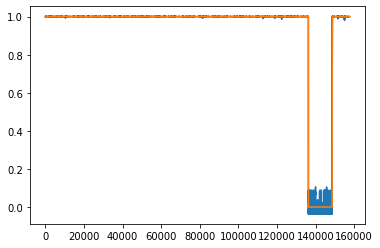

In [0]:
import matplotlib
digitized_output=np.where(output_test > 0.5, 1, 0.)
ax=matplotlib.pyplot.plot(output_test)
#ax=matplotlib.pyplot.plot(output)
#ax=matplotlib.pyplot.plot(test_setin)
ax=matplotlib.pyplot.plot(test_setout)
#matplotlib.pyplot.xlim(10000,20000)
#matplotlib.pyplot.ylim(0,1)
#print(len(output-output_test>0.3))
#for i in range(0,1000000):
#    if output[i]<0.4:
#        print(output[i]-output_test[i])